<h1>Частина 2. Виконання та підготовка розділу 2 пояснювальної записки.</h1>

<h3>Мета Частини 2: Отримати досвід використання основних засобів аналізу та візуалізації даних у середовищі IPython
Notebook на модельних наборах даних.</h3>

<h4>Завдання 1. Встановити IPython Notebook разом з Anaconda та створити новий IPython Notebook 3/2</h4>

Імпортування модулів:

In [1]:
import pandas as pd
import copy
import PyTaCo

<h4>Завдання 3. Відкрити набір даних засобами pandas.</h4>

Завантаження файлів у dataframe:

In [2]:
trains_dataframe = pd.read_csv("dataset/Regularities_by_liaisons_Trains_France.csv")

Видалення колонок з коментарями:

In [3]:
trains_dataframe = trains_dataframe.drop(columns=['Comment (optional) delays at departure','Comment (optional) delays on arrival'])

<h4>Завдання 2. Проаналізувати набір даних на наявність пропущених значень та NaN.</h4>

Перевірка наявності NULL значень:

In [4]:
print(trains_dataframe.isnull().values.any())

True


<h4>Завдання 4. Представити набір даних у матричному вигляді. Відобразити 10 елементів для 4-ох ознак Виділити
зеленим кольором максимальні елементи в таблиці, а червоним мінімальні для цих 10-ти
елементів. Вирахувати математичне сподівання та дисперсію для набору даних. Стандартизувати дані.</h4>

Представлення набору даних у матричному вигляді:

In [29]:
trains_dataframe

Year  Month   Departure station             Arrival station  \
0     2019    7.0           ANGOULEME          PARIS MONTPARNASSE   
1     2019    7.0  PARIS MONTPARNASSE           LA ROCHELLE VILLE   
2     2019    7.0             LE MANS          PARIS MONTPARNASSE   
3     2019    7.0             ST MALO          PARIS MONTPARNASSE   
4     2019    7.0  PARIS MONTPARNASSE         ST PIERRE DES CORPS   
...    ...    ...                 ...                         ...   
7801  2020    5.0          PARIS LYON                 AVIGNON TGV   
7802  2020    5.0          PARIS LYON        MARSEILLE ST CHARLES   
7803  2020    5.0          PARIS LYON                       NIMES   
7804  2020    5.0          PARIS LYON  SAINT ETIENNE CHATEAUCREUX   
7805  2020    5.0              TOULON                  PARIS LYON   

      Average travel time (min)  Number of expected circulations  \
0                    131.914980                            247.0   
1                    175.611570                            242.0   
2                     62.395349                            435.0   
3                    172.421053                            114.0   
4                     67.310000                            404.0   
...                         ...                              ...   
7801                 162.702381                            191.0   
7802                 197.241206                            227.0   
7803                 182.094828                            129.0   
7804                        NaN                              NaN   
7805                 251.884615                             64.0   

      Number of cancelled trains  Number of late trains at departure  \
0                            0.0                               191.0   
1                            0.0                               178.0   
2                            5.0                               391.0   
3                            0.0                               101.0   
4                            4.0                               284.0   
...                          ...                                 ...   
7801                        23.0                                50.0   
7802                        28.0                                54.0   
7803                        13.0                                20.0   
7804                         4.0                                 0.0   
7805                        12.0                                39.0   

      Average delay of late departing trains (min)  \
0                                         3.576353   
1                                         9.780805   
2                                         3.896974   
3                                         1.950990   
4                                         8.379108   
...                                            ...   
7801                                      5.359667   
7802                                      5.702160   
7803                                      2.996667   
7804                                      0.000000   
7805                                      2.891026   

      Average delay of all departing trains (min)  ...  \
0                                        2.678273  ...   
1                                        7.033609  ...   
2                                        3.529341  ...   
3                                        1.685673  ...   
4                                        5.803125  ...   
...                                           ...  ...   
7801                                     1.201190  ...   
7802                                     1.125963  ...   
7803                                     0.040517  ...   
7804                                          NaN  ...   
7805                                     2.055769  ...   

      Average train delay > 15min  Number of late trains > 30min  \
0                       32.965873                            7.0   
1            

Візуалізація 10 значень з 4 колонок:

In [5]:
visualisation = trains_dataframe[0:10].style.hide(['Year', 'Month', 'Departure station', 'Arrival station',
                                             'Number of expected circulations',
                                             'Number of cancelled trains', 'Number of late trains at departure',
                                             'Average delay of late departing trains (min)',
                                             'Average delay of all departing trains (min)',
                                             'Average delay of late arriving trains (min)',
                                             '% trains late due to external causes (weather, obstacles, suspicious packages, malevolence, social movements, etc.)',
                                             '% trains late due to railway infrastructure (maintenance, works)',
                                             '% trains late due to traffic management (rail line traffic, network interactions)',
                                             '% trains late due to rolling stock',
                                             '% trains late due to station management and reuse of material',
                                             '% trains late due to passenger traffic (affluence, PSH management, connections)',
                                             'Number of late trains > 15min',
                                             'Number of late trains > 30min', 'Number of late trains > 60min', 'Period',
                                             'Delay due to external causes', 'Delay due to railway infrastructure',
                                             'Delay due to traffic management', 'Delay due to rolling stock',
                                             'Delay due to station management and reuse of material',
                                             'Delay due to travellers taken into account','Period'], axis="columns")

visualisation.highlight_max(color='green').highlight_min(color='red')

Перезавантаження данних у dataframe, видалення колонок з коментарями та рядків із NULL значеннями. Оскільки менше 5% рядків містять NULL значення та оскільки більшість рядків з NULL значеннями мають більше половини NULL значень, то їх можна видалити.

In [6]:
del trains_dataframe
trains_dataframe = pd.read_csv("dataset/Regularities_by_liaisons_Trains_France.csv")

trains_dataframe = trains_dataframe.drop(columns=['Comment (optional) delays at departure','Comment (optional) delays on arrival'])
trains_dataframe = trains_dataframe.dropna()
print(trains_dataframe.isnull().values.any())


False


Видалення рядків з явно помилковими (від'ємними) значеннями:

In [7]:
mask = trains_dataframe.applymap(lambda x: isinstance(x, (int, float)) and x < 0).any(axis=1)
trains_dataframe = trains_dataframe[~mask]

Створення dataframe з виключно числовими значеннями:

In [8]:
trains_dataframe_numerical = trains_dataframe.drop(columns=['Year', 'Month', 'Departure station', 'Arrival station','Period'])

Вирахування математичного сподівання набору даних:

In [9]:
trains_dataframe_numerical.mean()

Average travel time (min)                                                                                              166.749542
Number of expected circulations                                                                                        272.840132
Number of cancelled trains                                                                                               8.095729
Number of late trains at departure                                                                                      66.611592
Average delay of late departing trains (min)                                                                            14.967642
Average delay of all departing trains (min)                                                                              3.128474
Number of trains late on arrival                                                                                        37.057684
Average delay of late arriving trains (min)                                               

Вирахування дисперсії набору даних:

In [10]:
trains_dataframe_numerical.var()

Average travel time (min)                                                                                               6476.300342
Number of expected circulations                                                                                        24677.620043
Number of cancelled trains                                                                                               464.726686
Number of late trains at departure                                                                                      6406.866151
Average delay of late departing trains (min)                                                                             174.250359
Average delay of all departing trains (min)                                                                               23.808039
Number of trains late on arrival                                                                                         866.144200
Average delay of late arriving trains (min)                                 

Функція стандартизації колонки значень:

In [11]:
def standartizatinator(input_column):
    mean = input_column.mean()
    
    variation = input_column.var()
    
    return (input_column - mean)/variation

Використання створеної функції:

In [12]:
trains_dataframe_numerical_standart = trains_dataframe_numerical
trains_dataframe_numerical_standart = standartizatinator(trains_dataframe_numerical)

Імпортування бібліотек для візуалізації даних:

<h4>Завдання 5. Провести візуалізацію даних. Для цього необхідно побудувати такі типи графіків: Line Plot,
Bare Chart, Histogram, Heatmap.</h4>

In [13]:
#import seaborn as waluigi
import seaborn as sns
import matplotlib.pyplot as plt

Створення lineplot для перших 100 значень середньої тривалості поїздки та середньої затримки у стандартизованих значеннях:

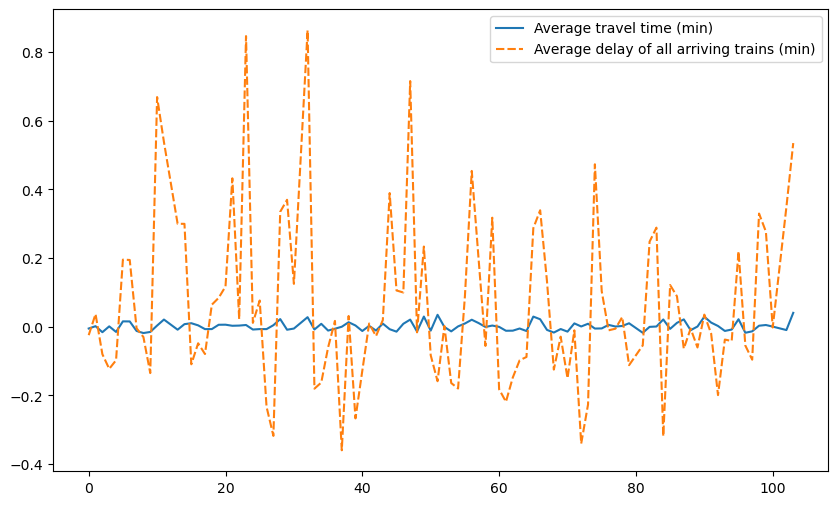

In [14]:
plt.figure(figsize=(10, 6))
lineplot = sns.lineplot(trains_dataframe_numerical_standart.drop(['Number of expected circulations',
                                             'Number of cancelled trains', 'Number of late trains at departure',
                                             'Average delay of late departing trains (min)',
                                             'Average delay of all departing trains (min)',
                                             'Average delay of late arriving trains (min)',
                                             '% trains late due to external causes (weather, obstacles, suspicious packages, malevolence, social movements, etc.)',
                                             '% trains late due to railway infrastructure (maintenance, works)',
                                             '% trains late due to traffic management (rail line traffic, network interactions)',
                                             '% trains late due to rolling stock',
                                             '% trains late due to station management and reuse of material',
                                             '% trains late due to passenger traffic (affluence, PSH management, connections)',
                                             'Number of late trains > 15min',
                                             'Number of late trains > 30min', 'Number of late trains > 60min',
                                             'Delay due to external causes', 'Delay due to railway infrastructure',
                                             'Delay due to traffic management', 'Delay due to rolling stock',
                                             'Delay due to station management and reuse of material',
                                             'Delay due to travellers taken into account','Number of trains late on arrival','Average train delay > 15min'],axis='columns')[0:100])

Створення barplot для відношення кількості потягів, які відправились з затримкою, до станцій

<Axes: xlabel='Departure station', ylabel='Number of late trains at departure'>

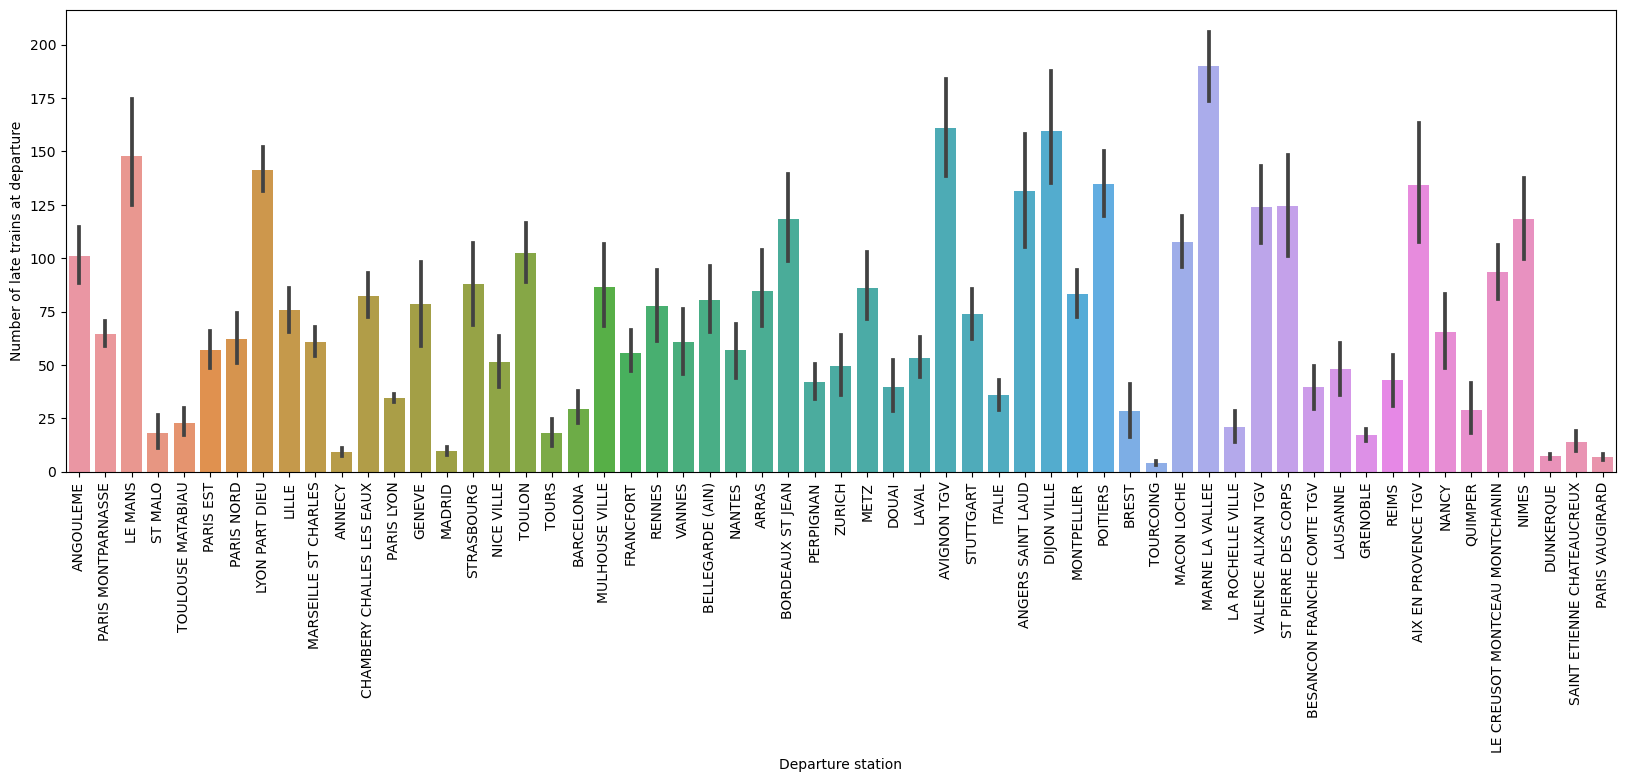

In [15]:
plt.figure(figsize=(20, 6))
barplot = sns.barplot(x = trains_dataframe['Departure station'], y = trains_dataframe_numerical['Number of late trains at departure'])
locs, labels = plt.xticks()
plt.setp(labels, rotation=90)
barplot

Середня затримка потягів що запізнились за станціями:

<Axes: xlabel='Departure station', ylabel='Arrival station'>

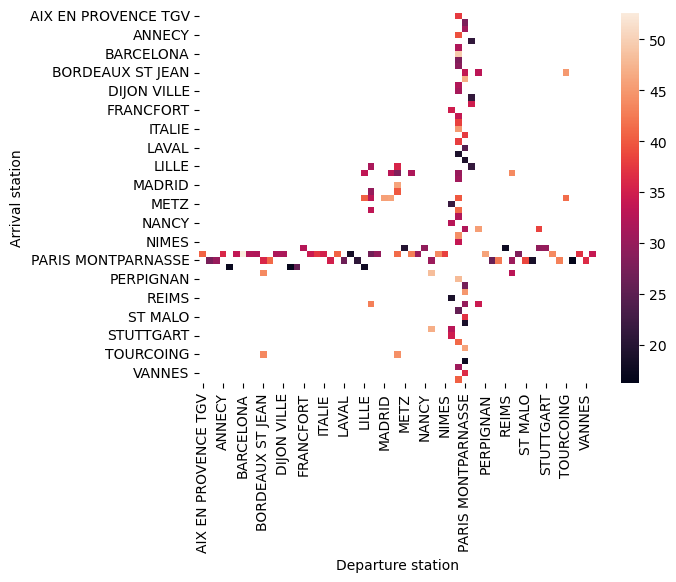

In [16]:
heatmap_df = trains_dataframe[['Departure station', 'Arrival station', 'Average delay of late arriving trains (min)']]
heatmap_grouped = heatmap_df.groupby([heatmap_df['Departure station'],heatmap_df['Arrival station']], as_index=False).mean()
heatmap_table = heatmap_grouped.pivot(index='Arrival station', columns='Departure station', values='Average delay of late arriving trains (min)')
sns.heatmap(heatmap_table)

Гістограмма кількості затриманих потягів, що прибувають, для перших 200 потягів

<Axes: xlabel='Departure station', ylabel='Count'>

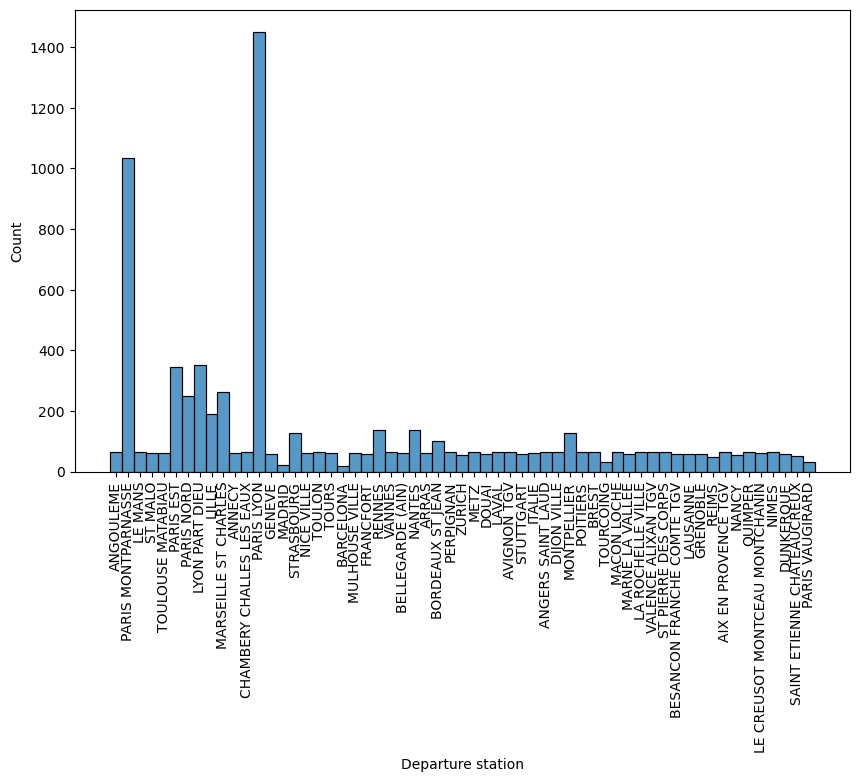

In [17]:
plt.figure(figsize=(10, 6))
histplot = sns.histplot(trains_dataframe_numerical.drop(['Average travel time (min)', 'Number of expected circulations',
       'Number of cancelled trains', 'Number of late trains at departure',
       'Average delay of late departing trains (min)',
       'Average delay of all departing trains (min)',
       'Number of trains late on arrival',
       'Average delay of late arriving trains (min)',
       '% trains late due to external causes (weather, obstacles, suspicious packages, malevolence, social movements, etc.)',
       '% trains late due to railway infrastructure (maintenance, works)',
       '% trains late due to traffic management (rail line traffic, network interactions)',
       '% trains late due to rolling stock',
       '% trains late due to station management and reuse of material',
       '% trains late due to passenger traffic (affluence, PSH management, connections)',
       'Number of late trains > 15min', 'Average train delay > 15min',
       'Number of late trains > 30min', 'Number of late trains > 60min',
       'Delay due to external causes', 'Delay due to railway infrastructure',
       'Delay due to traffic management', 'Delay due to rolling stock',
       'Delay due to station management and reuse of material',
       'Delay due to travellers taken into account'],axis='columns')[0:200],x = trains_dataframe['Departure station'])

locs, labels = plt.xticks()
plt.setp(labels, rotation=90)
histplot

<h4>Завдання 6. Збудувати лінійний графік з 4-ма лініями, які взяті з ознак та додати annotate для середнього
значення кожної лінії. При цьому для візуалізації багатовимірних даних з кількістю ознак
більше двох обов’язково необхідно за допомогою subplot збудувати 9 графіків за
допомогою комбінування різних ознак.</h4>

Лінійний графік з 4-ма лініями, які взяті з ознак з доданим annotate для середнього значення кожної лінії, де:<br>
Av. av. ldt -- середнє середньої затримки потягів відправлених із затримкою<br>
Av. av. adt -- середнє середньої затримки усіх відправлених потягів<br>
Av. av. lat -- середнє середньої затримки потягів прийнятих із затримкою<br>
Av. av. aat -- середнє середньої затримки усіх прийнятих потягів<br>

<Axes: >

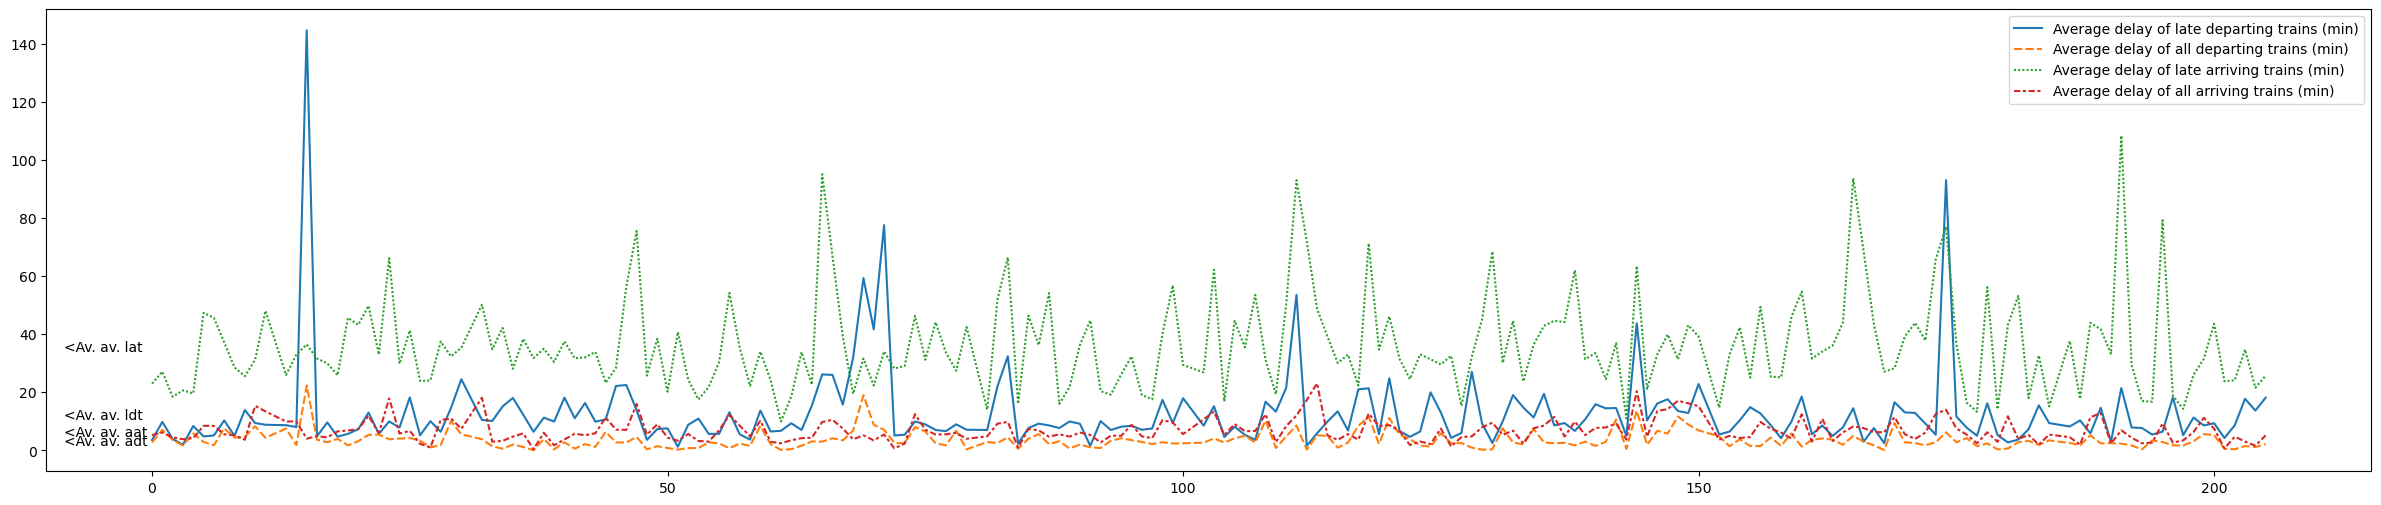

In [18]:
plt.figure(figsize=(30, 6))
range_of_plot = 200
pos_x = (range_of_plot/200)*(-8.5)
quad_lineplot = sns.lineplot(data = trains_dataframe_numerical[['Average delay of late departing trains (min)','Average delay of all departing trains (min)','Average delay of late arriving trains (min)','Average delay of all arriving trains (min)']][:range_of_plot])
quad_lineplot.text(pos_x,trains_dataframe_numerical[['Average delay of late departing trains (min)']][:range_of_plot].mean()-2,"<Av. av. ldt",fontsize=10)
quad_lineplot.text(pos_x,trains_dataframe_numerical[['Average delay of all departing trains (min)']][:range_of_plot].mean()-2,"<Av. av. adt",fontsize=10)
quad_lineplot.text(pos_x,trains_dataframe_numerical[['Average delay of late arriving trains (min)']][:range_of_plot].mean()-2,"<Av. av. lat",fontsize=10)
quad_lineplot.text(pos_x,trains_dataframe_numerical[['Average delay of all arriving trains (min)']][:range_of_plot].mean()-2,"<Av. av. aat",fontsize=10)
quad_lineplot

Pairplot (не входить у завдання курсової роботи):

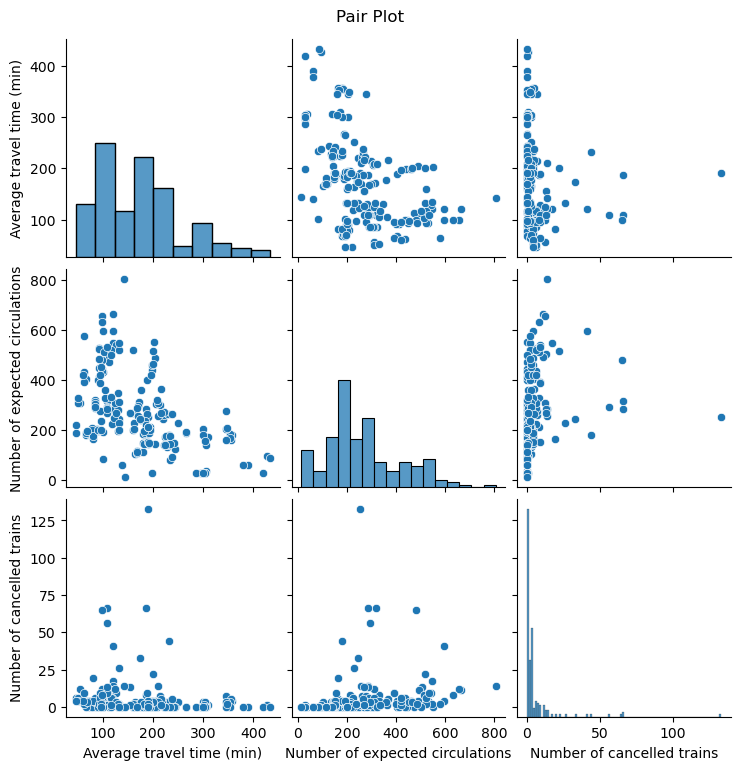

In [30]:
range_of_plot = 200
columns_of_interest = trains_dataframe_numerical.columns[0:3]

# Створіть підмножину даних для аналізу
subset_data = trains_dataframe_numerical[columns_of_interest][:range_of_plot]

# Додайте назви ліній в анотації
pair_plot = sns.pairplot(subset_data)

# Встановіть заголовок для всього графіку
pair_plot.fig.suptitle('Pair Plot', y=1.02)

plt.show()


9 графіків subplot:

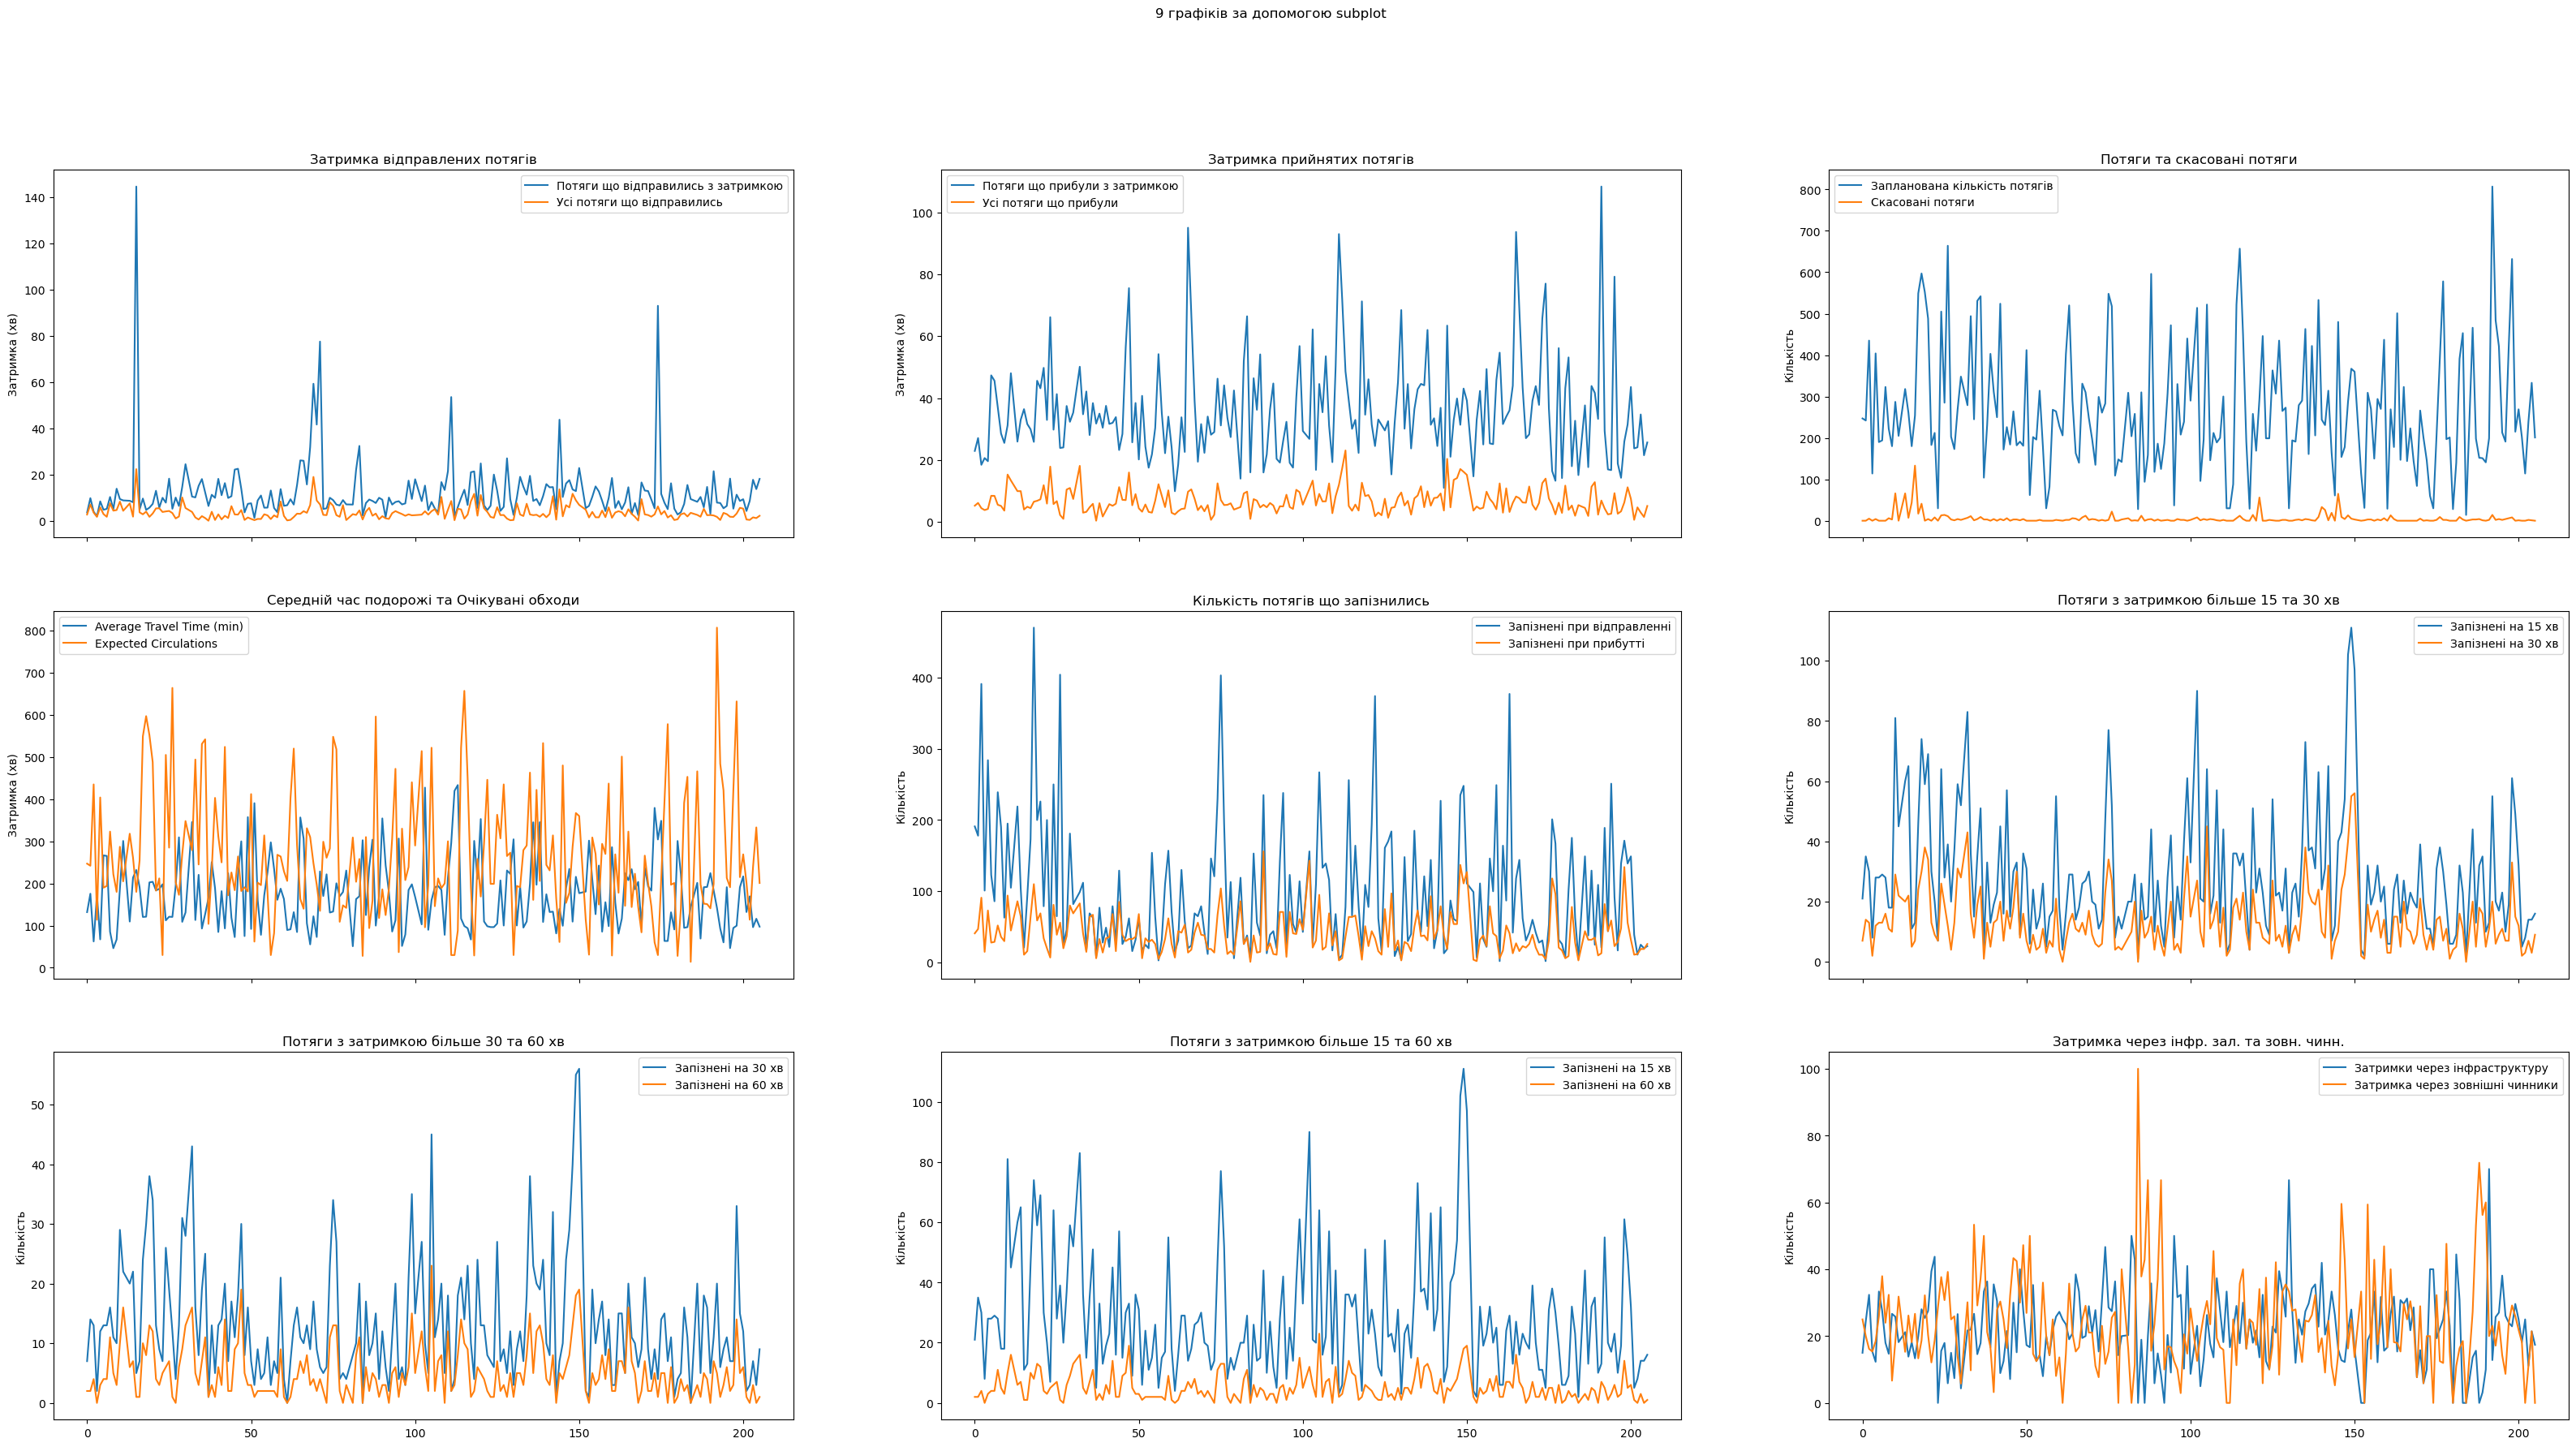

In [20]:
range_of_plot = 200
fig, axes = plt.subplots(3, 3, sharex=True, figsize=(40, 20))
fig.suptitle('9 графіків за допомогою subplot')

# графік середніх затримок відправлених затриманих і усіх потягів
sns.lineplot(x=trains_dataframe_numerical.index[:range_of_plot],
             y=trains_dataframe_numerical['Average delay of late departing trains (min)'][:range_of_plot],
             ax=axes[0, 0], label='Потяги що відправились з затримкою')

sns.lineplot(x=trains_dataframe_numerical.index[:range_of_plot],
             y=trains_dataframe_numerical['Average delay of all departing trains (min)'][:range_of_plot],
             ax=axes[0, 0], label='Усі потяги що відправились')

axes[0, 0].set_ylabel("Затримка (хв)")
axes[0, 0].set_title("Затримка відправлених потягів")
axes[0, 0].legend()

# графік середніх затримок прийнятих затриманих і усіх потягів
sns.lineplot(x=trains_dataframe_numerical.index[:range_of_plot],
             y=trains_dataframe_numerical['Average delay of late arriving trains (min)'][:range_of_plot],
             ax=axes[0, 1], label='Потяги що прибули з затримкою')

sns.lineplot(x=trains_dataframe_numerical.index[:range_of_plot],
             y=trains_dataframe_numerical['Average delay of all arriving trains (min)'][:range_of_plot],
             ax=axes[0, 1], label='Усі потяги що прибули')

axes[0, 1].set_ylabel("Затримка (хв)")
axes[0, 1].set_title("Затримка прийнятих потягів")
axes[0, 1].legend()

#графік кількості потягів та кількості скасованих потягів
sns.lineplot(x=trains_dataframe_numerical.index[:range_of_plot],
             y=trains_dataframe_numerical['Number of expected circulations'][:range_of_plot],
             ax=axes[0, 2], label='Запланована кількість потягів')

sns.lineplot(x=trains_dataframe_numerical.index[:range_of_plot],
             y=trains_dataframe_numerical['Number of cancelled trains'][:range_of_plot],
             ax=axes[0, 2], label='Скасовані потяги')

axes[0, 2].set_ylabel("Кількість")
axes[0, 2].set_title("Потяги та скасовані потяги")
axes[0, 2].legend()

sns.lineplot(x=trains_dataframe_numerical.index[:range_of_plot],
             y=trains_dataframe_numerical['Average travel time (min)'][:range_of_plot],
             ax=axes[1, 0], label='Average Travel Time (min)')

sns.lineplot(x=trains_dataframe_numerical.index[:range_of_plot],
             y=trains_dataframe_numerical['Number of expected circulations'][:range_of_plot],
             ax=axes[1, 0], label='Expected Circulations')

axes[1, 0].set_ylabel("Затримка (хв)")
axes[1, 0].set_title("Середній час подорожі та Очікувані обходи")
axes[1, 0].legend()

#графік кількості потягів що запізнились при відправленні та при прибутті
sns.lineplot(x=trains_dataframe_numerical.index[:range_of_plot],
             y=trains_dataframe_numerical['Number of late trains at departure'][:range_of_plot],
             ax=axes[1, 1], label='Запізнені при відправленні')

sns.lineplot(x=trains_dataframe_numerical.index[:range_of_plot],
             y=trains_dataframe_numerical['Number of trains late on arrival'][:range_of_plot],
             ax=axes[1, 1], label='Запізнені при прибутті')

axes[1, 1].set_ylabel("Кількість")
axes[1, 1].set_title("Кількість потягів що запізнились")
axes[1, 1].legend()

#графік кількості потягів що запізнились на більше ніж 15 та 30 хвилин
sns.lineplot(x=trains_dataframe_numerical.index[:range_of_plot],
             y=trains_dataframe_numerical['Number of late trains > 15min'][:range_of_plot],
             ax=axes[1, 2], label='Запізнені на 15 хв')

sns.lineplot(x=trains_dataframe_numerical.index[:range_of_plot],
             y=trains_dataframe_numerical['Number of late trains > 30min'][:range_of_plot],
             ax=axes[1, 2], label='Запізнені на 30 хв')

axes[1, 2].set_ylabel("Кількість")
axes[1, 2].set_title("Потяги з затримкою більше 15 та 30 хв")
axes[1, 2].legend()

#графік кількості потягів що запізнились на більше ніж 30 та 60 хвилин
sns.lineplot(x=trains_dataframe_numerical.index[:range_of_plot],
             y=trains_dataframe_numerical['Number of late trains > 30min'][:range_of_plot],
             ax=axes[2, 0], label='Запізнені на 30 хв')

sns.lineplot(x=trains_dataframe_numerical.index[:range_of_plot],
             y=trains_dataframe_numerical['Number of late trains > 60min'][:range_of_plot],
             ax=axes[2, 0], label='Запізнені на 60 хв')

axes[2, 0].set_ylabel("Кількість")
axes[2, 0].set_title("Потяги з затримкою більше 30 та 60 хв")
axes[2, 0].legend()

#графік кількості потягів що запізнились на більше ніж 15 та 60 хвилин
sns.lineplot(x=trains_dataframe_numerical.index[:range_of_plot],
             y=trains_dataframe_numerical['Number of late trains > 15min'][:range_of_plot],
             ax=axes[2, 1], label='Запізнені на 15 хв')

sns.lineplot(x=trains_dataframe_numerical.index[:range_of_plot],
             y=trains_dataframe_numerical['Number of late trains > 60min'][:range_of_plot],
             ax=axes[2, 1], label='Запізнені на 60 хв')

axes[2, 1].set_ylabel("Кількість")
axes[2, 1].set_title("Потяги з затримкою більше 15 та 60 хв")
axes[2, 1].legend()

#графік кількості затримок через інфраструктуру залізниці та зовнішні чинники
sns.lineplot(x=trains_dataframe_numerical.index[:range_of_plot],
             y=trains_dataframe_numerical['Delay due to railway infrastructure'][:range_of_plot],
             ax=axes[2, 2], label='Затримки через інфраструктуру')

sns.lineplot(x=trains_dataframe_numerical.index[:range_of_plot],
             y=trains_dataframe_numerical['Delay due to external causes'][:range_of_plot],
             ax=axes[2, 2], label='Затримка через зовнішні чинники')

axes[2, 2].set_ylabel("Кількість")
axes[2, 2].set_title("Затримка через інфр. зал. та зовн. чинн.")
axes[2, 2].legend()


plt.show()

<h4>Завдання 7. Вирахувати коефіцієнт пірсона для кожної пари ознак. Взяти третю ознаку за вісь X та збудувати relplot для двох ознак, що мають найбільшу
кореляцію за допомогою бібліотеки seaborn.</h4>

Вирахування коефіцієнту пірсона для усіх ознак:

In [21]:
trains_dataframe_numerical[trains_dataframe_numerical.columns[:]].corr(method='pearson')

Average travel time (min)  \
Average travel time (min)                                            1.000000   
Number of expected circulations                                     -0.422380   
Number of cancelled trains                                          -0.101023   
Number of late trains at departure                                  -0.241376   
Average delay of late departing trains (min)                         0.007823   
Average delay of all departing trains (min)                         -0.011267   
Number of trains late on arrival                                    -0.302332   
Average delay of late arriving trains (min)                          0.523772   
Average delay of all arriving trains (min)                           0.414675   
% trains late due to external causes (weather, ...                   0.170682   
% trains late due to railway infrastructure (ma...                  -0.019466   
% trains late due to traffic management (rail l...                  -0.019637   
% trains late due to rolling stock                                  -0.035059   
% trains late due to station management and reu...                  -0.174602   
% trains late due to passenger traffic (affluen...                  -0.069359   
Number of late trains > 15min                                        0.004150   
Average train delay > 15min                                          0.084902   
Number of late trains > 30min                                        0.034758   
Number of late trains > 60min                                        0.048106   
Delay due to external causes                                         0.170682   
Delay due to railway infrastructure                                 -0.019466   
Delay due to traffic management                                     -0.019637   
Delay due to rolling stock                                          -0.035059   
Delay due to station management and reuse of ma...                  -0.174602   
Delay due to travellers taken into account                          -0.069359   

                                                    Number of expected circulations  \
Average travel time (min)                                                 -0.422380   
Number of expected circulations                                            1.000000   
Number of cancelled trains                                                 0.197935   
Number of late trains at departure                                         0.436352   
Average delay of late departing trains (min)                               0.032154   
Average delay of all departing trains (min)                               -0.033096   
Number of trains late on arrival                                           0.697027   
Average delay of late arriving trains (min)                               -0.171800   
Average delay of all arriving trains (min)                                -0.183584   
% trains late due to external causes (weather, ...                         0.031694   
% trains late due to railway infrastructure (ma...                        -0.007062   
% trains late due to traffic management (rail l...                        -0.092135   
% trains late due to rolling stock                                         0.032499   
% trains late due to station management and reu...                         0.066302   
% trains late due to passenger traffic (affluen...                         0.016515   
Number of late trains > 15min                                              0.592819   
Average train delay > 15min                                               -0.034843   
Number of late trains > 30min                                              0.540980   
Number of late trains > 60min                                              0.443139   
Delay due to external causes                                               0.031694   
Delay due to railway infrastructure                                       -0.007062   
Delay due to traffic management

Вирахування коефіцієнту пірсона для кожної пари ознак:

In [22]:
table = [['Коефіцієнт'],['Ознака 1'],['Ознака 2']]
columns = trains_dataframe_numerical.columns
for column_1 in range(len(columns)):
    for column_2 in range(column_1+1,len(columns)):
        table[1].append(columns[column_1])
        table[2].append(columns[column_2])
        table[0].append(trains_dataframe_numerical[columns[column_1]].corr(trains_dataframe_numerical[columns[column_2]],method = 'pearson'))
table = PyTaCo.PyTableConsole(table)
table.sort_by_column(0,1)
print(table)

|            Коефіцієнт|                                                                                                           Ознака 1|                                                                                                           Ознака 2|
|                   1.0|% trains late due to external causes (weather, obstacles, suspicious packages, malevolence, social movements, etc.)|                                                                                       Delay due to external causes|
|                   1.0|                                  % trains late due to traffic management (rail line traffic, network interactions)|                                                                                    Delay due to traffic management|
|                   1.0|                                                      % trains late due to station management and reuse of material|                                                              Delay due to station manage

Використання третьої ознаки для вісі абцис та побудова scatterplot для двох ознак, що мають найбільшу кореляцію за допомогою бібліотеки seaborn:

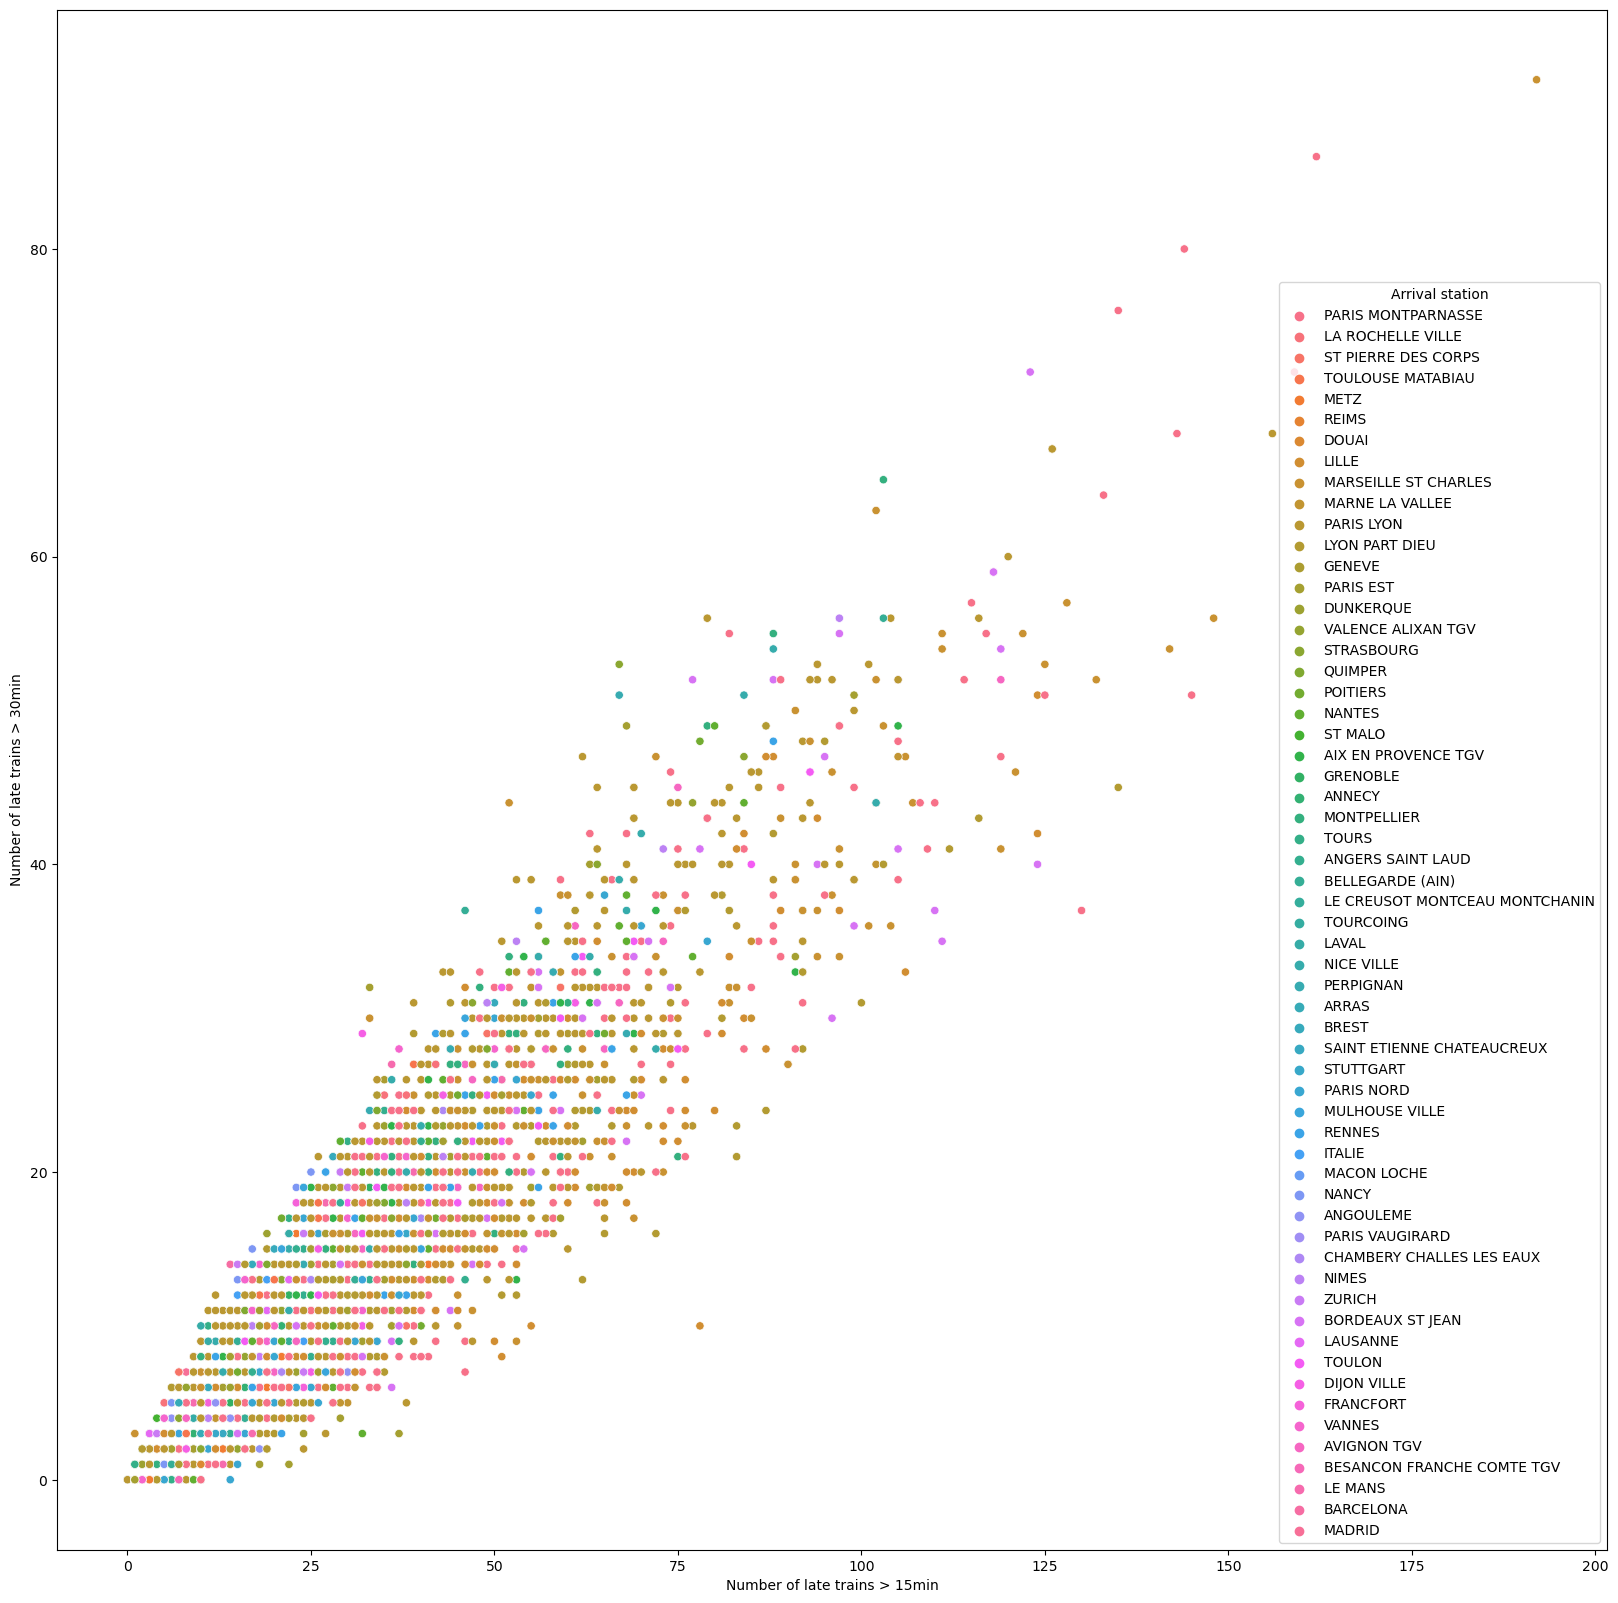

In [23]:
range_of_plot = -1
plt.figure(figsize=(20, 20))
sns.scatterplot(trains_dataframe[:range_of_plot], x = 'Number of late trains > 15min', y = 'Number of late trains > 30min', hue = 'Arrival station')
plt.show()

<h4>Завдання 8 та 9. У початковому наборі даних, перед заміною значень Nan на валідні значення за допомогою
fillna, необхідно видалити всі колонки із значеннями Nan. Видалити також випадкові значення з ознак що мають найбільшу кореляцію у кількості 10%
для обох. Підрахувати кореляцію. Збудувати multipple scatterplot за допомогою FacetGrid
для цих оновлених ознак використовуючи бібліотеку seaborn взявши третю ознаку за вісь x.</h4>

Видалення усіх колонок що містять Nan значення:

In [38]:
del trains_dataframe
trains_dataframe = pd.read_csv("dataset/Regularities_by_liaisons_Trains_France.csv")
trains_dataframe = trains_dataframe.dropna(axis = 1)
trains_dataframe = trains_dataframe.drop(columns=['Year', 'Month', 'Departure station', 'Arrival station','Period'])
print(trains_dataframe.columns)


table = [['Коефіцієнт'],['Ознака 1'],['Ознака 2']]
columns = trains_dataframe.columns
for column_1 in range(len(columns)):
    for column_2 in range(column_1+1,len(columns)):
        table[1].append(columns[column_1])
        table[2].append(columns[column_2])
        table[0].append(trains_dataframe[columns[column_1]].corr(trains_dataframe[columns[column_2]],method = 'pearson'))
table = PyTaCo.PyTableConsole(table)
table.sort_by_column(0,1)
print(table)

Index(['Number of cancelled trains', 'Number of late trains at departure',
       'Average delay of late departing trains (min)'],
      dtype='object')
|          Коефіцієнт|                          Ознака 1|                                    Ознака 2|
|  0.1388011665256719|        Number of cancelled trains|          Number of late trains at departure|
|-0.02761331701785993|        Number of cancelled trains|Average delay of late departing trains (min)|
| -0.2079206058010782|Number of late trains at departure|Average delay of late departing trains (min)|



Видалення випадкових значень з ознак що мають найбільше кореляцію у кількості 10% для обох:

In [40]:
trains_dataframe_for_correlation = trains_dataframe[['Number of cancelled trains','Number of late trains at departure']]
print("Початкова кількість рядків: "+str(len(trains_dataframe_for_correlation)))
rows_to_remove = int(0.1 * len(trains_dataframe_for_correlation))
rows_to_remove_indices = trains_dataframe_for_correlation.sample(rows_to_remove, random_state=42).index
trains_dataframe_for_correlation.drop(rows_to_remove_indices, inplace=True)
print("Кількість рядків після видалення: "+str(len(trains_dataframe_for_correlation)))

Початкова кількість рядків: 7806
Кількість рядків після видалення: 7026


C:\Users\misha\AppData\Local\Temp\ipykernel_26924\2457360726.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trains_dataframe_for_correlation.drop(rows_to_remove_indices, inplace=True)


Кореляція цих значень:

In [26]:
trains_dataframe_for_correlation.corr(method = 'pearson')

Number of cancelled trains  \
Number of cancelled trains                            1.000000   
Number of late trains at departure                    0.139942   

                                    Number of late trains at departure  
Number of cancelled trains                                    0.139942  
Number of late trains at departure                            1.000000

Побудова multiple scatterplot за допомогою FacetGrid взявши третю ознаку за вісь x:

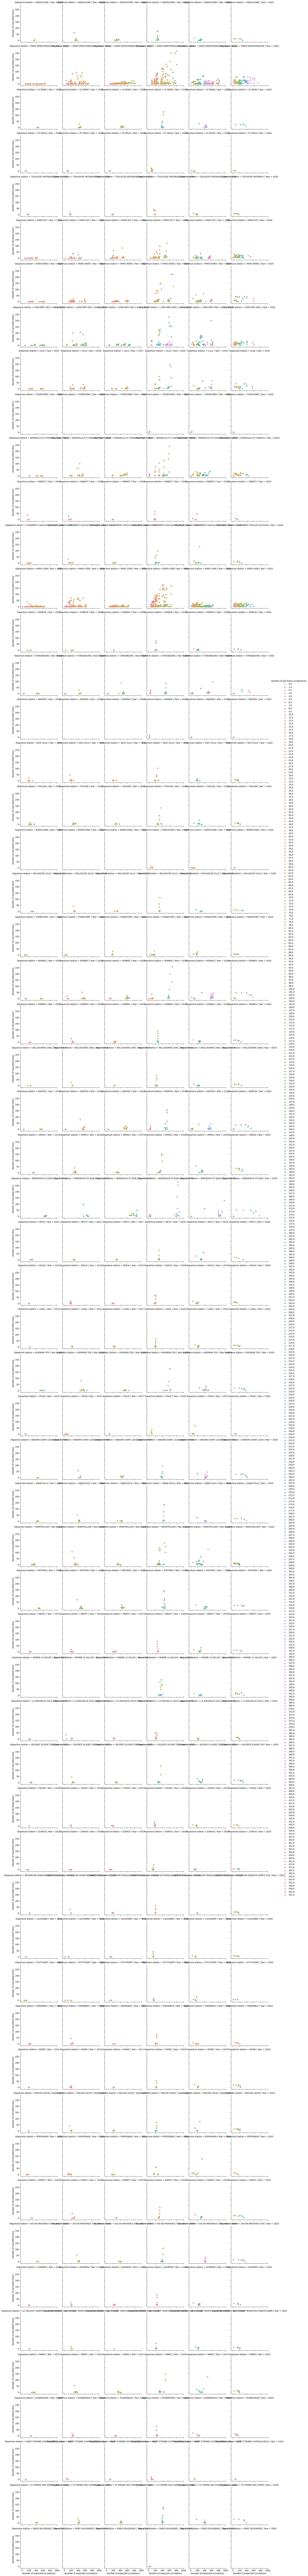

In [27]:
del trains_dataframe
trains_dataframe = pd.read_csv("dataset/Regularities_by_liaisons_Trains_France.csv")
trains_dataframe.drop(rows_to_remove_indices, inplace=True)
g = sns.FacetGrid(trains_dataframe[:], row = 'Departure station', col = 'Year', hue='Number of late trains at departure')
g.map(sns.scatterplot, 'Number of expected circulations', 'Number of cancelled trains')
g.add_legend()